In [2]:
import numpy
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
pd.set_option('display.max_columns', 20)

In [4]:
data=pd.read_excel("./Data/Data DS Cotton Plus.xlsx", sheet_name="BD")
data.shape

(9976, 40)

In [5]:
data.drop(["Cedula","Tipo de Contacto","Fecha Nacimiento","Mes Nacimiento","Dia Nacimiento","Direccion Valido?",
            "Telefono Movil", "TelefonoOficina", "Telefono Casa", "Mail", "Direccion"], axis = 1, inplace = True)


In [6]:
data.drop(["Mail Valido?","Tel Ofc Valid?","Tel Casa Valido?","Cel Valido?","Estado Civil"], axis=1, inplace= True)

In [7]:
data.dtypes

Nombre Completo                                                     object
Segmento                                                            object
Compro 2019?                                                        object
Compro 2020?                                                        object
Monto Comprado 2019?                                                 int64
Nro Transacciones 2019                                               int64
Monto Comprado 2020                                                  int64
Nro Transacciones 2020                                               int64
Es Contactable                                                      object
Ciudad de Residencia                                                object
Genero                                                              object
Edad                                                                 int64
Monto Total de ultima compra                                         int64
Cantidad Articulos       

In [8]:

dataobj=data.select_dtypes(include = ["object"]).copy()
dataobj.head()


,Nombre Completo,Segmento,Compro 2019?,Compro 2020?,Es Contactable,Ciudad de Residencia,Genero
0,Nombre Cliente 4866,Adictos,Si,Si,Si,BOGOTA,Mujer
1,Nombre Cliente 3636,Adictos,Si,No,Si,MEDELLIN,Mujer
2,Nombre Cliente 2941,Adictos,Si,Si,Si,MEDELLIN,Mujer
3,Nombre Cliente 4520,Adictos,Si,Si,Si,ENVIGADO,Mujer
4,Nombre Cliente 2740,Adictos,Si,Si,Si,CALI,Mujer


In [9]:
datainfo=data.select_dtypes(include =["int64"]).copy()


In [10]:
datainfo.describe().T

,count,mean,std,min,25%,50%,75%,max
Monto Comprado 2019?,9976.0,243866.951784,456434.639083,0.0,0.0,113485.0,288625.0,9231860.0
Nro Transacciones 2019,9976.0,2.462711,4.698831,0.0,0.0,1.0,3.0,92.0
Monto Comprado 2020,9976.0,25067.011628,132247.695598,0.0,0.0,0.0,0.0,6448400.0
Nro Transacciones 2020,9976.0,0.263532,1.287152,0.0,0.0,0.0,0.0,60.0
Edad,9976.0,40.361868,26.029822,10.0,25.0,31.0,44.0,111.0
Monto Total de ultima compra,9976.0,590206.416500,957754.256892,1900.0,154800.0,303700.0,652525.0,31004180.0
Cantidad Articulos,9976.0,11.969326,36.553076,1.0,1.0,4.0,10.0,2179.0
Recencia (Tiempo transcurrido en semanas desde su ultima compra),9976.0,10.423817,7.298794,0.0,4.0,12.0,14.0,48.0
Frecuencia (Cantidad items comprados),9976.0,5.775160,9.595314,1.0,1.0,3.0,6.0,301.0
Monto - MARCA COTTON- B/quilla.,9976.0,28802.528067,229728.153523,0.0,0.0,0.0,0.0,6928460.0


In [11]:
dataobj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9976 entries, 0 to 9975
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Nombre Completo       9976 non-null   object
 1   Segmento              9976 non-null   object
 2   Compro 2019?          9976 non-null   object
 3   Compro 2020?          9976 non-null   object
 4   Es Contactable        9976 non-null   object
 5   Ciudad de Residencia  9976 non-null   object
 6   Genero                9976 non-null   object
dtypes: object(7)
memory usage: 545.7+ KB


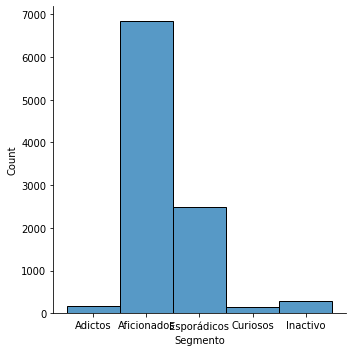

In [12]:
dataobj["Segmento"].value_counts()
sns.displot(dataobj["Segmento"])

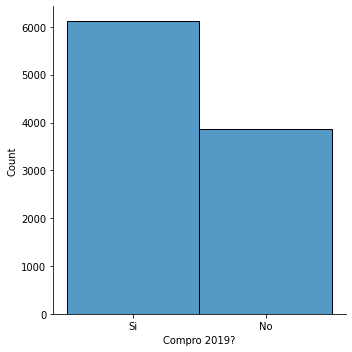

In [13]:
dataobj["Compro 2019?"].value_counts()
sns.displot(dataobj["Compro 2019?"])


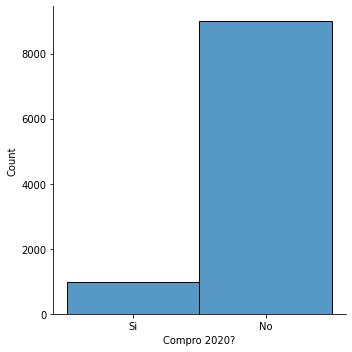

In [14]:
dataobj["Compro 2020?"].value_counts()
sns.displot(dataobj["Compro 2020?"])


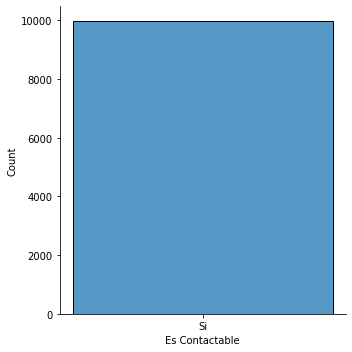

In [15]:
dataobj["Es Contactable"].value_counts()
sns.displot(dataobj["Es Contactable"])

In [16]:
pd.DataFrame(dataobj["Ciudad de Residencia"].value_counts()).reset_index().rename(columns={"index":"Ciudad de Residencia",
"Ciudad de Residencia":"Cantidad"})


,Ciudad de Residencia,Cantidad
0,MEDELLIN,2075
1,MANIZALES,1582
2,BOGOTA,697
3,BARRANQUILLA,611
4,PEREIRA,591
...,...,...
246,PUERTO PARRA,1
247,TOCA,1
248,LA PLATA,1
249,LA TEBAIDA,1


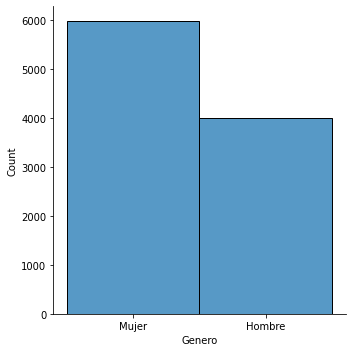

In [17]:

sns.displot(dataobj["Genero"])
